In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [108]:
# read data into a numpy array
# in 4th column, replace S with 0 and L with 1
# in 5th column, replace R with 0 and M with 1

data = np.genfromtxt('Factors Affecting Extinction.csv', delimiter=',', skip_header=0, usecols=(1,2,3,4), 
                     converters={3: lambda l: l == b'L', 4: lambda m: m == b'M'},
                     dtype=[('f0', '<f8'), ('f1', '<f8'), ('f2', '<i4'), ('f3', '<i4')], names=True)
data = np.array(data.tolist()).reshape(62,4)
print(data)

[[ 3.03  1.    1.    0.  ]
 [ 5.46  2.    1.    0.  ]
 [ 4.1   1.21  1.    0.  ]
 [ 1.68  1.13  1.    0.  ]
 [ 8.85  5.17  1.    0.  ]
 [ 1.49  1.    1.    1.  ]
 [ 7.69  2.75  1.    0.  ]
 [ 3.85  5.63  1.    0.  ]
 [16.67  3.    1.    0.  ]
 [ 4.22  4.67  1.    1.  ]
 [ 8.13  4.06  1.    0.  ]
 [ 5.    1.    1.    0.  ]
 [ 7.3   6.96  1.    1.  ]
 [ 1.    1.67  1.    1.  ]
 [27.03  5.56  1.    0.  ]
 [ 3.11  2.83  1.    1.  ]
 [ 4.    4.38  1.    1.  ]
 [16.13  4.13  1.    1.  ]
 [ 3.48  3.67  1.    0.  ]
 [37.04  8.33  1.    0.  ]
 [ 7.3   2.75  1.    0.  ]
 [ 2.53  1.43  1.    1.  ]
 [ 4.13  2.    1.    0.  ]
 [ 2.    2.75  1.    0.  ]
 [10.    4.5   1.    0.  ]
 [ 2.67  7.12  1.    0.  ]
 [ 4.59  4.58  1.    0.  ]
 [58.82  2.35  1.    0.  ]
 [32.26  6.87  0.    0.  ]
 [ 2.57  3.83  0.    1.  ]
 [ 2.16  5.    0.    1.  ]
 [ 1.    1.25  0.    1.  ]
 [ 2.97  2.27  0.    0.  ]
 [ 9.52  5.35  0.    0.  ]
 [11.11  8.7   0.    0.  ]
 [ 7.3   6.1   0.    0.  ]
 [ 4.    3.33  0.    0.  ]
 

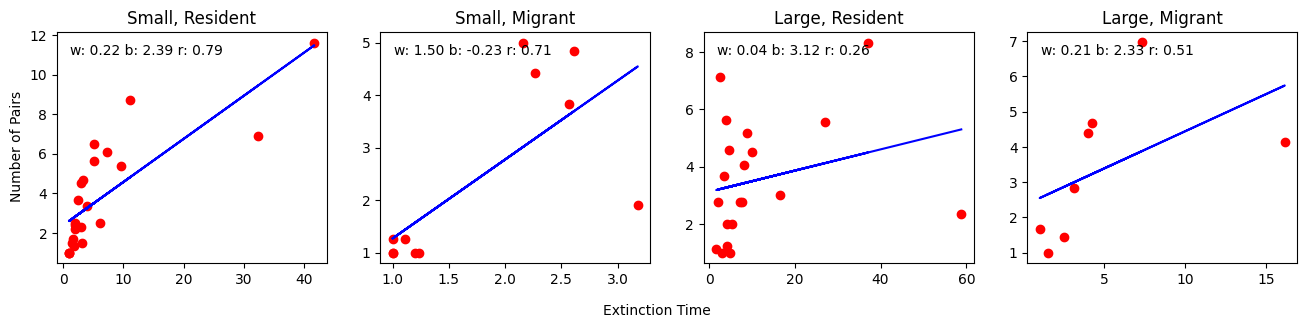

In [109]:
# filter out data, in different combinations of 3rd and 4th column
filters = [(0, 0), (0, 1), (1, 0), (1, 1)]
data_filtered = []

for f in filters:
    mask = (data[:,2] == f[0]) & (data[:,3] == f[1])
    data_filtered.append(data[mask])

# plot 2x2 subplots scatter plots, x-axis: 1st column (Extinction Time), y-axis: 2nd column (number of pairs)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))
fig.text(0.5, -0.05, 'Extinction Time', ha='center', va='center')
fig.text(0.1, 0.5, 'Number of Pairs', ha='center', va='center', rotation='vertical')

titles = ['Small, Resident', 'Small, Migrant', 'Large, Resident', 'Large, Migrant']

for i in range(4):
    axes[i].scatter(data_filtered[i][:,0], data_filtered[i][:,1], color='red')
    axes[i].set_title(titles[i])

    slope, intercept, r_value, _, _ = stats.linregress(data_filtered[i][:,0], data_filtered[i][:,1])
    axes[i].plot(data_filtered[i][:,0], intercept + slope*data_filtered[i][:,0], 'b', label='fitted line')
    axes[i].text(0.05, 0.95, 'w: %.2f b: %.2f r: %.2f' % (slope, intercept, r_value) , transform=axes[i].transAxes, fontsize=10, verticalalignment='top')
